In [97]:
import pandas as pd

# sklearn metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# Models and other classes/functions
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
# numpy for data manipulation and algebra
import numpy as np

# matplotlib for plotting trends/patterns in data
import matplotlib.pylab as plt
plt.style.use('ggplot')

# seaborn for more data visualization
import seaborn as sns

# import dataset and output the shape
df = pd.read_csv('data.csv', sep=';', header=[0])
df.shape

(4424, 37)

In [98]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [99]:
# DATA PRE-PROCESSING

# Modify dataset by dropping feature columns that are deemed irrelevant to analysis
df = df.drop(columns=['Application mode', 'Marital status', 'Application order', 
                      'Course', 'Nacionality', 'Displaced', 'Curricular units 1st sem (credited)', 
                      'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 
                      'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 
                      'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
                      'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 
                      'Curricular units 2nd sem (without evaluations)'])
# Rename feature with incorrect label
df = df.rename(columns={'Daytime/evening attendance\t': 'Daytime/Evening Attendance'})
# Remove all rows where a student was not enrolled for first and seconds semester and received no grades
df = df[df['Curricular units 1st sem (grade)'] != 0]
df = df[df['Curricular units 2nd sem (grade)'] != 0]

# Remove all rows where Target==Enrolled (improve model accuracy)
df = df[df['Target']!='Enrolled']

# Encode target values as integers
encoder = LabelEncoder()
df['Target_Encoded'] = encoder.fit_transform(df['Target'])
df = df.drop(columns=['Target'])

# These features are of interest for analysis
list(df.columns.values)

['Daytime/Evening Attendance',
 'Previous qualification',
 'Previous qualification (grade)',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)',
 'Unemployment rate',
 'Inflation rate',
 'GDP',
 'Target_Encoded']

In [100]:
# Display and describe entire df with features of interest (after resetting indices)
df = df.reset_index(drop=True)
df.head(10)

,Daytime/Evening Attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Educational special needs,Debtor,...,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target_Encoded
0,1,1,160.0,1,3,3,3,142.5,0,0,...,1,0,19,0,14.000000,13.666667,13.9,-0.3,0.79,1
1,1,1,122.0,38,37,5,3,119.6,0,0,...,0,0,20,0,13.428571,12.400000,9.4,-0.8,-3.12,1
2,0,1,100.0,37,38,9,9,141.5,0,0,...,0,0,45,0,12.333333,13.000000,13.9,-0.3,0.79,1
3,0,19,133.1,37,37,9,7,114.8,0,1,...,1,0,50,0,11.857143,11.500000,16.2,0.3,-0.92,1
4,1,1,142.0,19,38,7,10,128.4,0,0,...,0,1,18,0,13.300000,14.345000,15.5,2.8,-4.06,1
5,1,1,137.0,1,1,9,9,129.3,0,0,...,0,1,21,1,13.875000,14.142857,16.2,0.3,-0.92,1
6,1,1,138.0,1,19,4,7,123.0,0,1,...,0,0,18,0,11.400000,13.500000,8.9,1.4,3.51,0
7,1,1,139.0,38,19,5,7,130.6,0,0,...,0,0,18,0,12.333333,14.200000,13.9,-0.3,0.79,1
8,1,1,136.0,19,38,9,9,119.3,0,0,...,0,1,18,0,13.214286,13.214286,12.7,3.7,-1.70,1
9,1,42,110.0,1,1,4,7,111.8,0,0,...,0,1,21,0,10.571429,11.000000,8.9,1.4,3.51,1


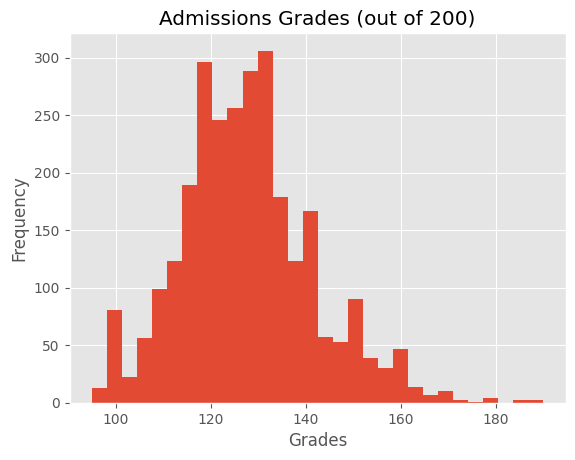

In [101]:
# Exploratory Data Analysis (EDA) and Graphs

# HISTOGRAM PLOT OF ADMISSIONS GRADES (OUT OF 200)
admissions_grades_plot = df['Admission grade'].plot(kind='hist', 
                                                    bins=30, 
                                                    title='Admissions Grades (out of 200)')
admissions_grades_plot.set_xlabel('Grades')

plt.show()

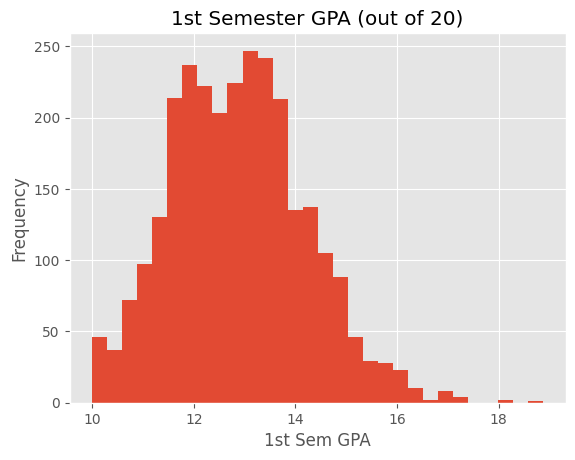

In [102]:
# HISTOGRAM PLOT OF FIRST SEMESTER GPA
first_sem_gpa_plot = df['Curricular units 1st sem (grade)'].plot(kind='hist', 
                                                                 bins=30, 
                                                                 title='1st Semester GPA (out of 20)')
first_sem_gpa_plot.set_xlabel('1st Sem GPA')
plt.show()

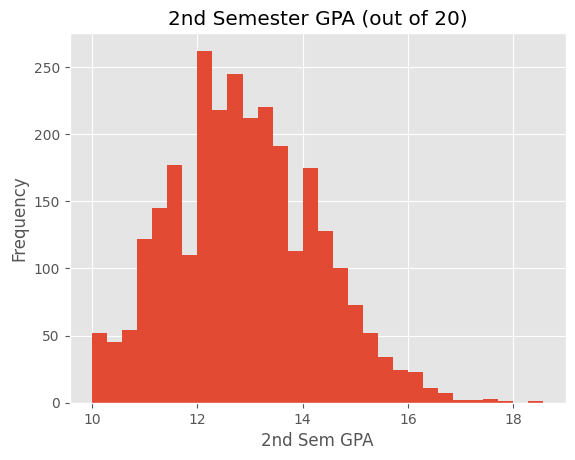

In [103]:
# HISTOGRAM PLOT OF SECOND SEMESTER GPA
second_sem_gpa_plot = df['Curricular units 2nd sem (grade)'].plot(kind='hist', 
                                                                  bins=30, 
                                                                  title='2nd Semester GPA (out of 20)')
second_sem_gpa_plot.set_xlabel('2nd Sem GPA')
plt.show()

In [104]:
# MORE EDA (Second Set of Graphs)

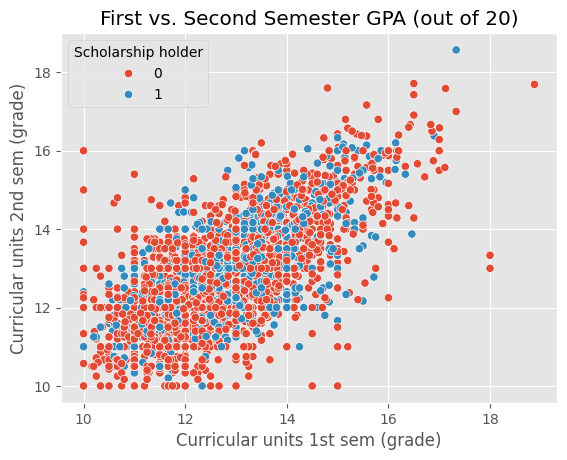

In [105]:
# Scatter Plot (Two features comparison)

# Making the scatter plot
scatterplot = sns.scatterplot(x='Curricular units 1st sem (grade)',
                              y='Curricular units 2nd sem (grade)',
                              hue='Scholarship holder',
                              data=df)
scatterplot.set_title('First vs. Second Semester GPA (out of 20)')

# Strong linear relationship among variables as shown
plt.show()
                     
                     

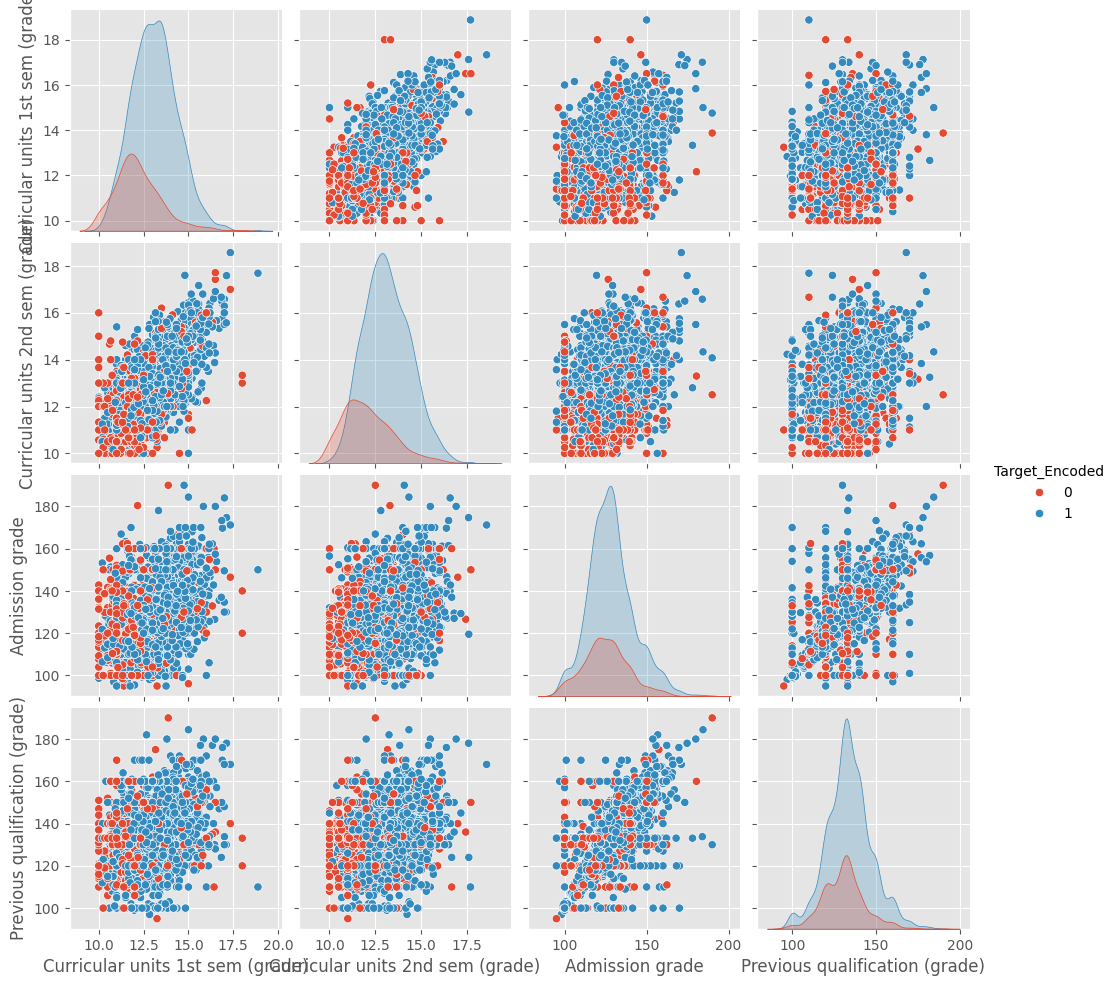

In [106]:
# Pair plot (multiple features comparison)
pair_plot = sns.pairplot(df, 
                        vars=['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 
                             'Admission grade', 'Previous qualification (grade)'],
                        hue='Target_Encoded')
plt.show()

In [107]:
# TRAINING SET AND TEST SET PREPARATION

# Separate data into input and output columns
X = df.drop(columns=['Target_Encoded'])
y = df['Target_Encoded']
# Seperate into training and testing sets - 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [108]:
# MACHINE LEARNING MODEL
# Number 1 - Decision Tree Classification Model

# Instantiate DTC class and call fit function on training values
DTC_model = DecisionTreeClassifier()
DTC_model.fit(X_train.values, y_train.values)

# Make the predictions with DCF model on test values
predictions = DTC_model.predict(X_test.values)

# Testing DTC model accuracy
# About 75% to 80% predictive accuracy (average on several trials)
accuracy = accuracy_score(y_test.values, predictions)

accuracy

0.786096256684492

In [109]:
f1 = f1_score(y_test.values, predictions, average='weighted')
f1

0.7882099591473605

In [110]:
roc_auc = roc_auc_score(y_test.values, DTC_model.predict_proba(X_test.values)[:,1])
roc_auc

0.7147073290703394

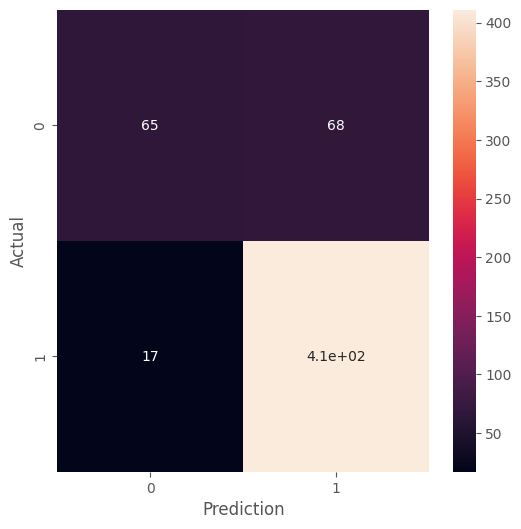

In [111]:
# MACHINE LEARNING MODEL
# Number 2 - Logistic Regression

# Train model and make predictions
LR_model = LogisticRegression(multi_class='auto', max_iter=1000000)
LR_model.fit(X_train, y_train)
y_predictions = LR_model.predict(X_test)

# Visualize LR_model accuracy
c_matrix = confusion_matrix(y_test, y_predictions)
plt.figure(figsize = (6,6))
sns.heatmap(c_matrix, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Actual')

# LEGEND: 1 is Graduate, and 0 is Dropout
plt.show()

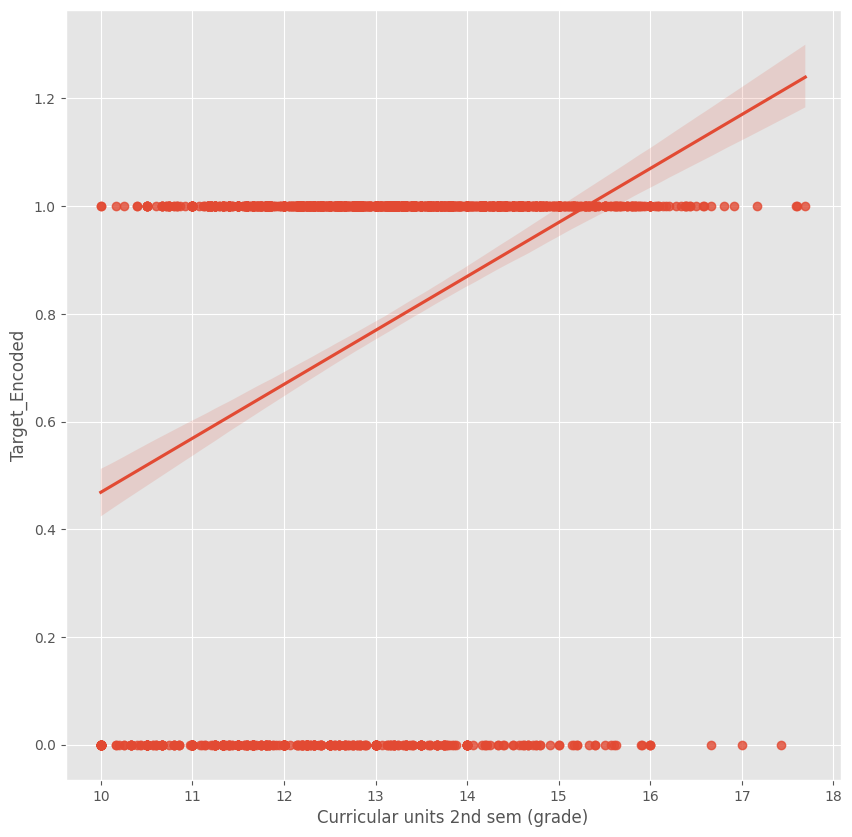

In [112]:
# Probability Visualization for LR Model
plt.figure(figsize=(10,10))
LR_reg_plot = sns.regplot(data=df, x=X_train['Curricular units 2nd sem (grade)'], y=y_train)
plt.show()

In [113]:
# Testing Logistic Regression accuracy - 
# About 82% to 86% predictive accuracy (average on several trials)
LR_model.score(X_test, y_test)

0.8484848484848485

In [114]:
f1_LR = f1_score(y_test.values, y_predictions, average='weighted')
f1_LR

0.8347742443278454

In [115]:
# MACHINE LEARNING MODEL
# Number 3 - Support Vector Machine Classification

# Linear kernel classifier
SVM_model = svm.SVC(kernel='linear')

# Train SVM model
SVM_model.fit(X_train.values, y_train.values)

# Predictions
svm_y_predictions = SVM_model.predict(X_test.values)

In [116]:
SVM_accuracy = accuracy_score(y_test.values, svm_y_predictions)
SVM_accuracy

0.8253119429590018

In [117]:
f1_SVM = f1_score(y_test.values, svm_y_predictions, average='weighted')
f1_SVM

0.7940225054684725

In [118]:
SVM_recall = recall_score(y_test.values, svm_y_predictions)
SVM_recall

0.9813084112149533

In [119]:
SVM_precision = precision_score(y_test.values, svm_y_predictions)
SVM_precision

0.8235294117647058